In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df_bank_data=pd.read_csv("Churn_Modelling.csv")

In [3]:
df_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df_bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df_bank_data.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [6]:
df_bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
cols=df_bank_data.columns
# for eachCol in cols:
#     print("****"+eachCol+"****")
#     print(df_bank_data[eachCol].unique())

# df_bank_data[["CreditScore","Geography","Tenure","NumOfProducts","HasCrCard","IsActiveMember"]].values_count()

## We have got two below categorical variable:
Geography: France, Spain, Germany<br>
Gender:    Male, Female

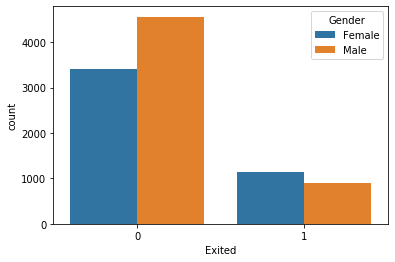

In [8]:
sns.countplot(data=df_bank_data,x="Exited",hue="Gender")

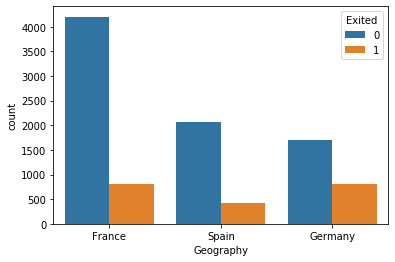

In [9]:
sns.countplot(data=df_bank_data,x="Geography",hue="Exited")

(array([  49., 1592., 4346., 2618.,  931.]),
 array([10, 20, 30, 40, 50, 60]),
 <a list of 5 Patch objects>)

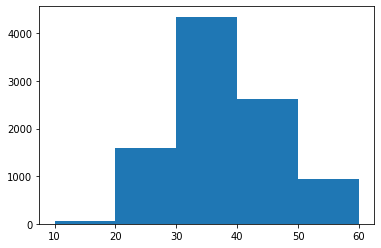

In [10]:
plt.hist(data=df_bank_data,x="Age",bins=[10,20,30,40,50,60])

In [11]:
def get_Age_cat(row):
    if ((row["Age"]>=15) & (row["Age"]<30)):
        return "15-30"
    if ((row["Age"]>=30) & (row["Age"]<45)):
        return "30-45"
    if ((row["Age"]>=45) & (row["Age"]<60)):
        return "45-60"
    if ((row["Age"]>=60) & (row["Age"]<75)):
        return "60-75"
    if ((row["Age"]>=75) & (row["Age"]<90)):
        return "75-90"
    else:
        return "90+"

In [12]:
df_bank_data["Age_Grp"]=df_bank_data.apply(get_Age_cat,axis=1)

In [13]:
df_bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Grp
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,30-45
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,30-45
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,30-45
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-45
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,30-45


In [14]:
df_bank_data["Age_Grp"].value_counts()

30-45    6019
45-60    1814
15-30    1641
60-75     472
75-90      52
90+         2
Name: Age_Grp, dtype: int64

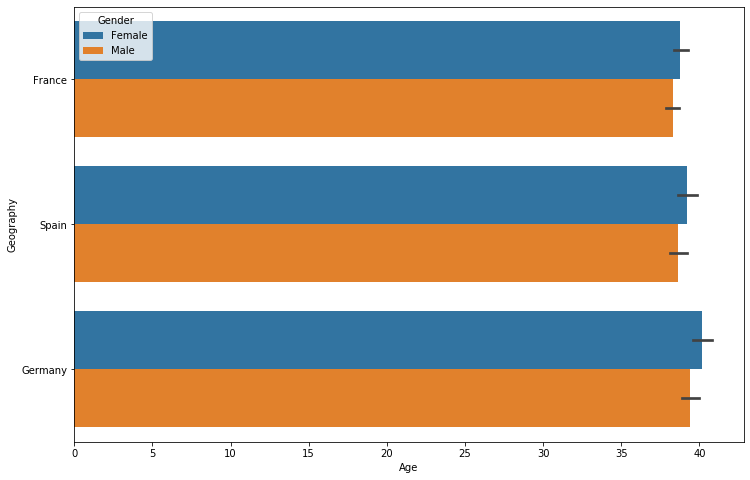

In [15]:
ax=plt.figure(figsize=(12,8))
sns.barplot(data=df_bank_data,x="Age",y="Geography",hue="Gender")

In [16]:
final_data=pd.get_dummies(df_bank_data,columns=["Geography","Gender"], drop_first=True)

In [17]:
final_data.drop("Age_Grp",axis=1,inplace=True)

In [18]:
y=final_data["Exited"]
X=final_data.drop("Exited",axis=1)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=2)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.optimizers import SGD
from keras import metrics

Using TensorFlow backend.


In [23]:
model=Sequential()

In [24]:
model.add(Dense(64,activation="relu",input_dim=11))
model.add(Dropout(.5))
model.add(Dense(32,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(30,activation="relu"))
model.add(Dropout(.3))
# model.add(Dense(15,activation="relu"))
# model.add(Dropout(.4))


model.add(Dense(1,activation="softmax"))

In [25]:
sgd=SGD(lr=.04,decay=1e-6,momentum=.9,nesterov=True)

In [26]:
model.compile(loss="binary_crossentropy",optimizer=sgd,metrics=['accuracy'])

In [27]:
# model.fit(X_train.values,y_train.values,epochs=1000,batch_size=100)

In [35]:
from sklearn.preprocessing import StandardScaler
stdsclr=StandardScaler()

In [36]:
X_Train_scaled=stdsclr.fit_transform(X_train)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [38]:
log_reg=LogisticRegression()

In [39]:
log_reg.fit(X_Train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
X_test_scaled=stdsclr.transform(X_test)

# print(classification_report(log_reg,X_Train_scaled,y_train))

In [43]:
y_pred=log_reg.predict(X_test_scaled)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1617
           1       0.56      0.18      0.28       383

    accuracy                           0.82      2000
   macro avg       0.69      0.57      0.58      2000
weighted avg       0.78      0.82      0.78      2000



In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [50]:
score_list=[]
for i in range(1,45):
    nei_reg=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(nei_reg,X=X_Train_scaled,y=y_train,cv=20,n_jobs=1).mean()
    score_list.append(score)
    print("for neigh={0}, the score is:{1}".format(i,score))

for neigh=1, the score is:0.7962533242395264
for neigh=2, the score is:0.8227515351658446
for neigh=3, the score is:0.8234971554509716
for neigh=4, the score is:0.8287509273495459
for neigh=5, the score is:0.8286259226620165
for neigh=6, the score is:0.8313721851386571
for neigh=7, the score is:0.8322509351620948
for neigh=8, the score is:0.8325000031250196
for neigh=9, the score is:0.833503128144551
for neigh=10, the score is:0.8312512515703224
for neigh=11, the score is:0.8326284414277589
for neigh=12, the score is:0.831622811705073
for neigh=13, the score is:0.833499066400415
for neigh=14, the score is:0.8308778039237745
for neigh=15, the score is:0.8332540664316653
for neigh=16, the score is:0.831377807048794
for neigh=17, the score is:0.8345018828242676
for neigh=18, the score is:0.8331275015781348
for neigh=19, the score is:0.8348775109531934
for neigh=20, the score is:0.8320028132988332
for neigh=21, the score is:0.8347525093906837
for neigh=22, the score is:0.8321253101581885
f

In [59]:
score_list.index(max(score_list))

18

In [60]:
max(score_list)

0.8348775109531934

In [77]:
#n-19 will give higest score value as .8348775109531934
neigh_class=KNeighborsClassifier(n_neighbors=19)

In [78]:
neigh_class.fit(X_Train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [79]:
neigh_pred=neigh_class.predict(X_test_scaled)

In [80]:
neigh_class.score(X_Train_scaled,y_train)

0.8445

In [65]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1617
           1       0.56      0.18      0.28       383

    accuracy                           0.82      2000
   macro avg       0.69      0.57      0.58      2000
weighted avg       0.78      0.82      0.78      2000



In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
decision_tree_class=DecisionTreeClassifier()

In [68]:
decision_tree_class.fit(X_Train_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
decision_pred=decision_tree_class.predict(X_test_scaled)

In [90]:

print("*** Classification Report for Decision Tree ***")
print("              ")
print(classification_report(y_true=y_test,y_pred=decision_pred))

*** Classification Report for Decision Tree ***
              
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1617
           1       0.46      0.46      0.46       383

    accuracy                           0.79      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.79      0.79      0.79      2000



In [73]:
decision_tree_class.score(X_test_scaled,y_test)

0.7925

In [74]:
decision_tree_class.score(X_Train_scaled,y_train)

1.0

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
random_frst_class=RandomForestClassifier(n_estimators=20)

In [83]:
random_frst_class.fit(X_Train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
random_frst_class.score(X_Train_scaled,y_train)

0.994625

In [86]:
random_frst_pred=random_frst_class.predict(X_test_scaled)

In [87]:
random_frst_class.score(X_test_scaled,y_test)

0.8515

In [88]:
print(classification_report(y_true=y_test,y_pred=random_frst_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1617
           1       0.69      0.41      0.52       383

    accuracy                           0.85      2000
   macro avg       0.78      0.68      0.71      2000
weighted avg       0.84      0.85      0.84      2000



In [91]:
#Hyper tuning Randomforest classifer
from sklearn.model_selection import RandomizedSearchCV

In [92]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [98]:
random_frst_reg_hypertuning=RandomForestClassifier()
random_search_CV=RandomizedSearchCV(random_frst_reg_hypertuning,random_grid,n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [99]:
random_search_CV.fit(X_Train_scaled,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [100]:
print(random_search_CV.best_params_)

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [101]:
print(random_search_CV.best_score_)

0.86425


In [102]:
random_search_random_frst_pred=random_search_CV.predict(X_test_scaled)

In [104]:
random_search_random_frst_pred.shape

(2000,)

In [105]:
print(classification_report(y_true=y_test,y_pred=random_search_random_frst_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1617
           1       0.76      0.42      0.54       383

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.85      2000

